In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [44]:
#loaded Data
file_path = '../Data/raw_analyst_ratings.csv'

df = pd.read_csv(file_path)

In [48]:
#get info about the data
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype                    
---  ------      --------------    -----                    
 0   Unnamed: 0  1407328 non-null  int64                    
 1   headline    1407328 non-null  object                   
 2   url         1407328 non-null  object                   
 3   publisher   1407328 non-null  object                   
 4   date        1407328 non-null  datetime64[ns, UTC-04:00]
 5   stock       1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(4)
memory usage: 64.4+ MB
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [122]:
df["date"].head(15)

0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
5    2020-05-22 11:23:25-04:00
6    2020-05-22 09:36:20-04:00
7    2020-05-22 09:07:04-04:00
8    2020-05-22 08:37:59-04:00
9    2020-05-22 08:06:17-04:00
10   2020-05-22 00:00:00-04:00
11   2020-05-22 00:00:00-04:00
12   2020-05-21 00:00:00-04:00
13   2020-05-21 00:00:00-04:00
14   2020-05-21 00:00:00-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]

In [46]:
df['date'] = pd.to_datetime(df['date'], format='ISO8601')

In [47]:
# check for null
print(df.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [18]:
# get headlines and their counts
# Count the occurrences of each headline
headline_counts = df['headline'].value_counts()

print(headline_counts)

headline
Benzinga's Top Upgrades                                                                                                                                                                                                                            5449
Benzinga's Top Downgrades                                                                                                                                                                                                                          5372
Benzinga's Top Initiations                                                                                                                                                                                                                         4241
Stocks That Hit 52-Week Lows On Thursday                                                                                                                                                                                                           3962

In [19]:
print(df['stock'].value_counts())

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64


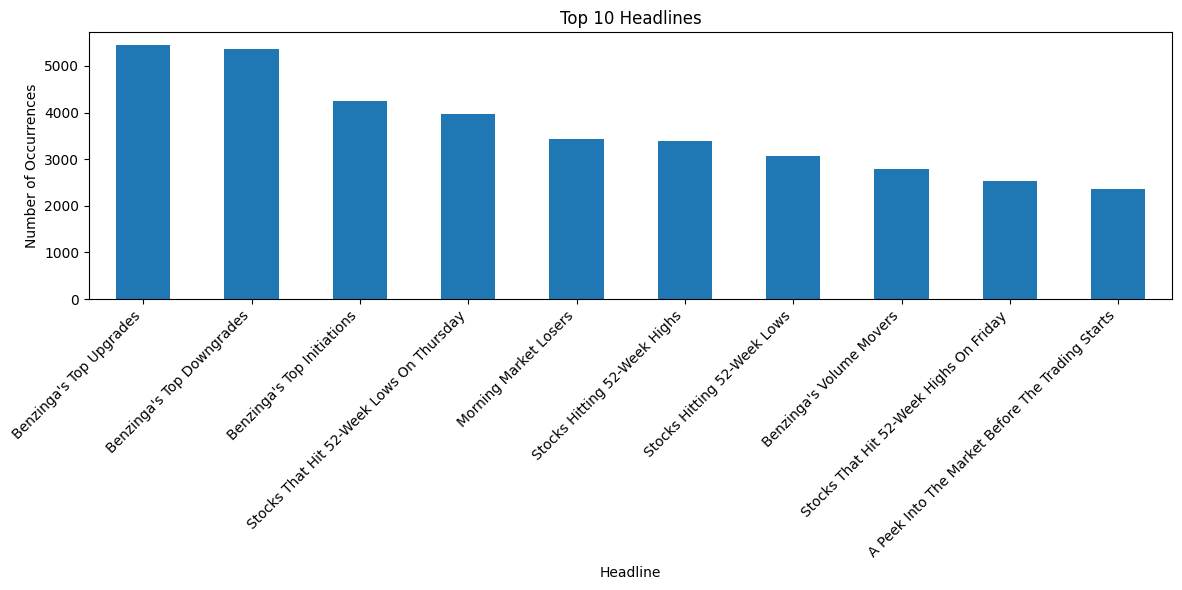

In [21]:

# Get the top 10 headlines
top_10_headlines = headline_counts.head(10)

# Create a bar chart for the top 10 headlines
plt.figure(figsize=(12, 6))
top_10_headlines.plot(kind='bar')
plt.title('Top 10 Headlines')
plt.xlabel('Headline')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_20560/2534540029.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_publishers.values, y=top_10_publishers.index, palette='coolwarm')


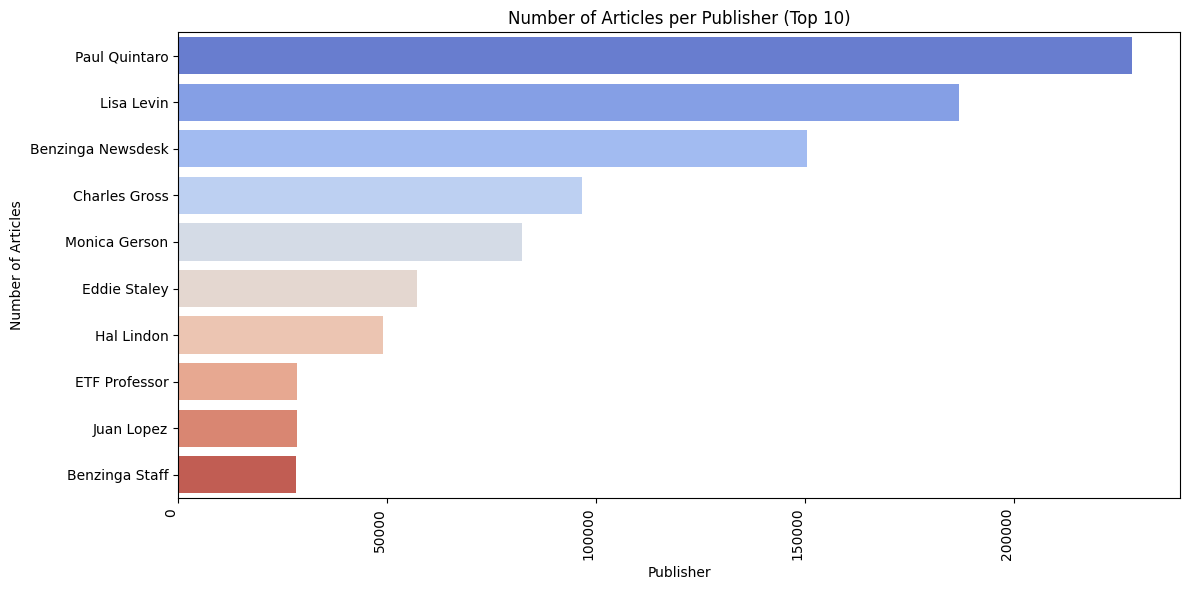

In [ ]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Get the top 10 publishers
top_10_publishers = publisher_counts.head(10)

# Create a bar chart for the top 10
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_publishers.values, y=top_10_publishers.index, palette='coolwarm')
plt.title('Number of Articles per Publisher (Top 10)')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

In [73]:
# Calculate key statistics for article counts per publisher
article_counts = df['publisher'].value_counts()

mean_count = article_counts.mean()
median_count = article_counts.median()
max_count = article_counts.max()
min_count = article_counts.min()
std_dev = article_counts.std()

print(f"Mean articles per publisher: {mean_count:.2f}")
print(f"Median articles per publisher: {median_count}")
print(f"Max articles by a single publisher: {max_count}")
print(f"Min articles by a single publisher: {min_count}")
print(f"Standard deviation: {std_dev:.2f}")


Mean articles per publisher: 1361.05
Median articles per publisher: 11.0
Max articles by a single publisher: 228373
Min articles by a single publisher: 1
Standard deviation: 11501.95


In [ ]:
# Calculate headline length in words
df['headline_word_count'] = df['headline'].apply(lambda x: len(str(x).split()))

# Preview the new column
print(df[['headline', 'headline_word_count']].head())
#average headline length of the whole dataset
avg_headline_length = df['headline_word_count'].mean()
print(f"Average headline length: {avg_headline_length:.2f} words")


                                            headline  headline_word_count
0            Stocks That Hit 52-Week Highs On Friday                    7
1         Stocks That Hit 52-Week Highs On Wednesday                    7
2                      71 Biggest Movers From Friday                    5
3       46 Stocks Moving In Friday's Mid-Day Session                    7
4  B of A Securities Maintains Neutral on Agilent...                   14
Average headline length: 11.42 words


In [28]:
# Calculate variance of headline lengths by publisher
headline_variance = df.groupby('publisher')['headline_word_count'].var().sort_values(ascending=False)

# Show top 20 publishers by variance
print(headline_variance.head(20))


publisher
Brad Hammond                 154.446886
Benzinga Newsdesk            109.023542
Luke J Jacobi                102.825832
luke@benzinga.com            101.837617
Benzinga Newsdesk            100.074754
Benzinga_Newsdesk             91.136163
gary                          84.500000
Hao Jin                       77.875705
Bryan Stanford                71.866667
Benzinga  Newsdesk            66.962636
PacificTrader                 48.000000
Benzinga Newdesk              46.455633
Hal Lindon                    42.331896
Michael Snyder                41.777778
Benzinga Pro Newsdesk         40.911987
andrewbeghou@benzinga.com     40.500000
Devonte Kavanaugh             40.500000
lbjacobi                      40.079695
Above Average Odds            39.565789
Hedge Fund Live               35.904762
Name: headline_word_count, dtype: float64


/tmp/ipykernel_20560/874576490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_headline_length.head(20).values, y=avg_headline_length.head(20).index, palette='coolwarm')


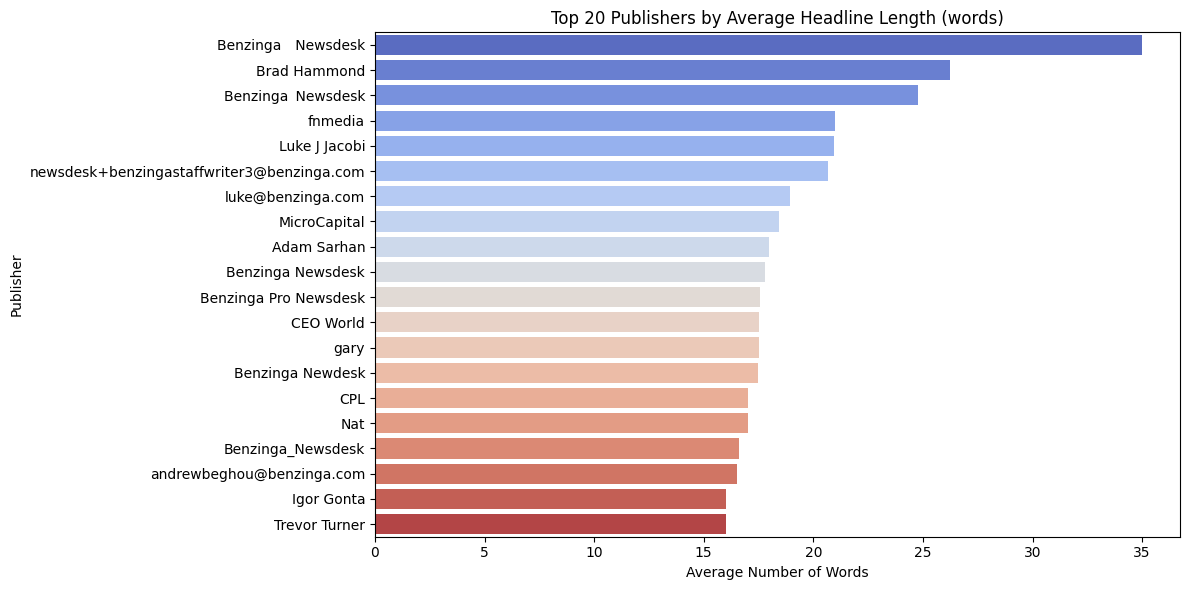

In [92]:
# Calculate average headline length per publisher
avg_headline_length = df.groupby('publisher')['headline_word_count'].mean().sort_values(ascending=False)

# Plot top 20 publishers by average headline length
plt.figure(figsize=(12,6))
sns.barplot(x=avg_headline_length.head(20).values, y=avg_headline_length.head(20).index, palette='coolwarm')
plt.title('Top 20 Publishers by Average Headline Length (words)')
plt.xlabel('Average Number of Words')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


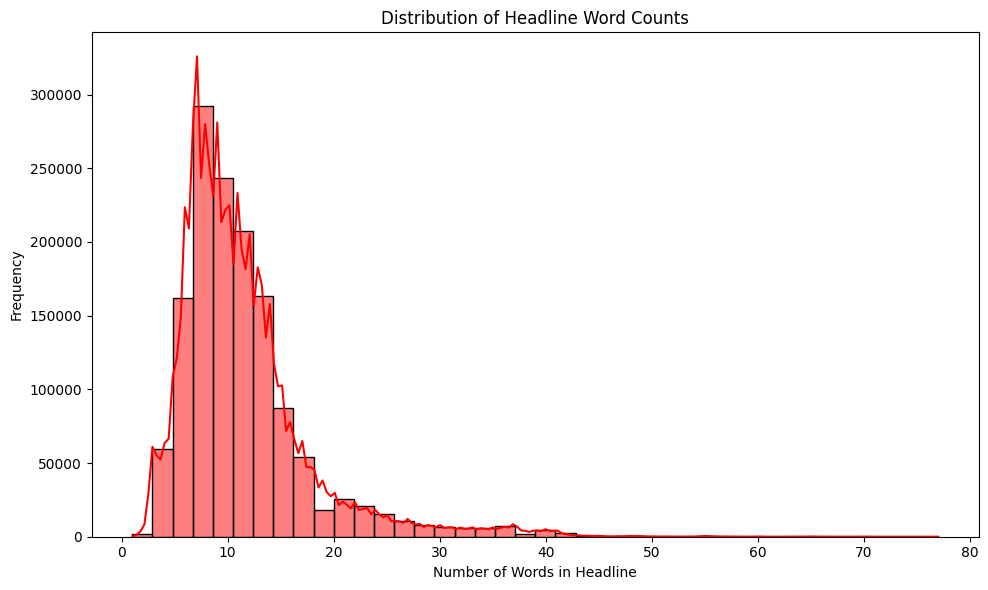

In [98]:
plt.figure(figsize=(10,6))
sns.histplot(df['headline_word_count'], bins=40, kde=True, color='red')
plt.title('Distribution of Headline Word Counts')
plt.xlabel('Number of Words in Headline')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [74]:
#Date separated by year month week day time
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['day'] = df['date'].dt.day
df['time'] = df['date'].dt.time


## Time Analysis ##

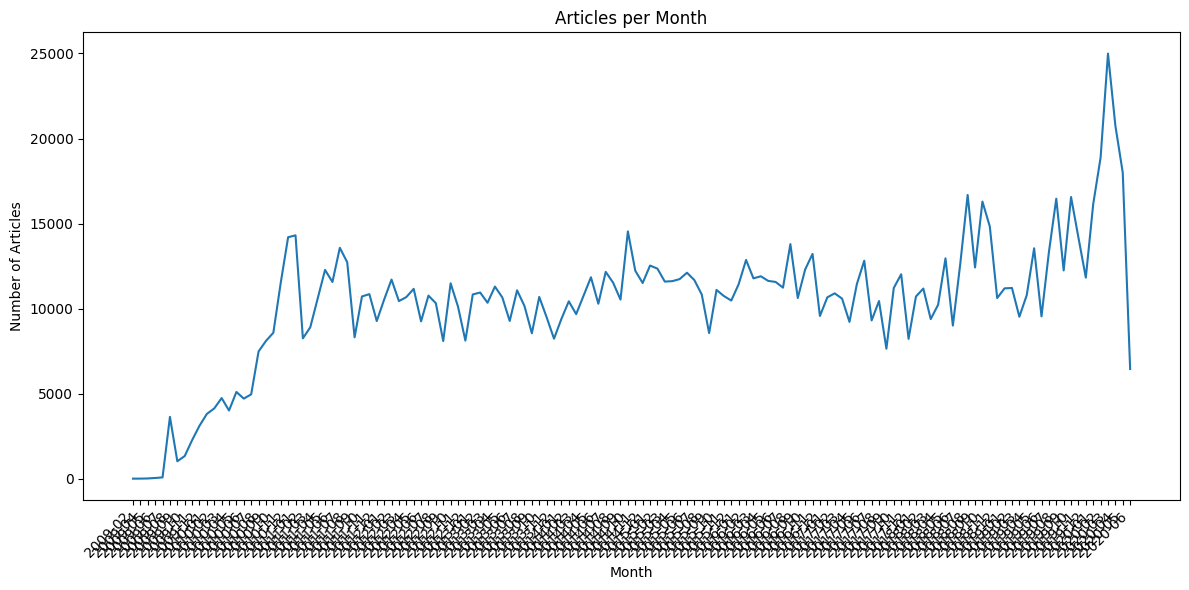

In [75]:
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_counts['year'].astype(str) + '-' + monthly_counts['month'].astype(str).str.zfill(2),
    monthly_counts['count']
)
plt.title('Articles per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

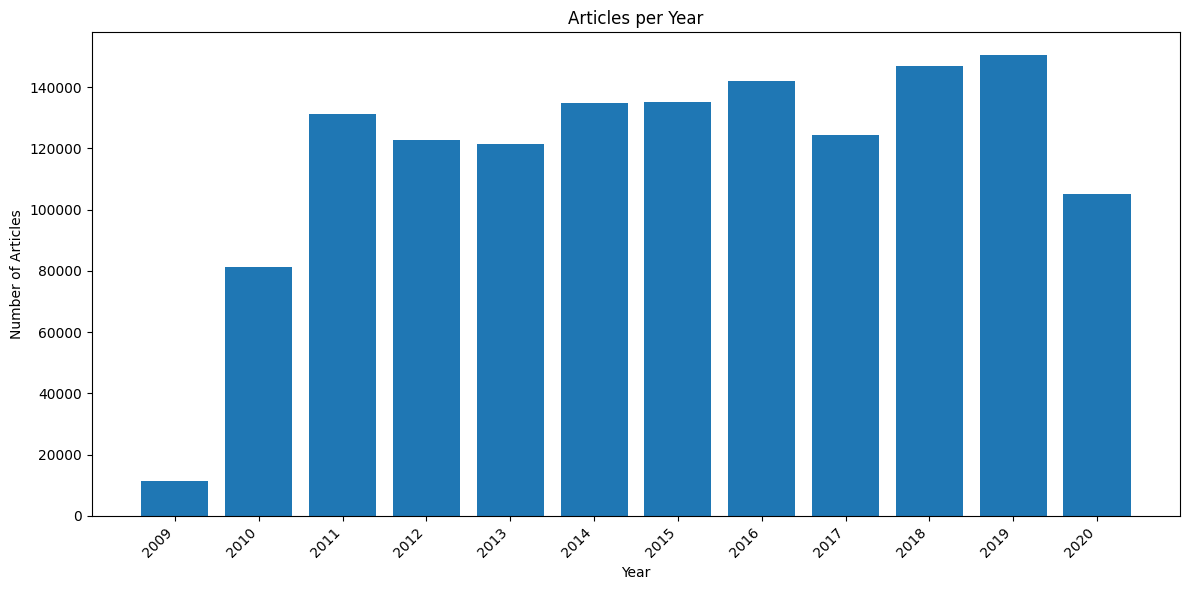

In [76]:
# count articles per year
yearly_counts = df.groupby('year').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.bar(yearly_counts['year'].astype(str), yearly_counts['count'])
plt.title('Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


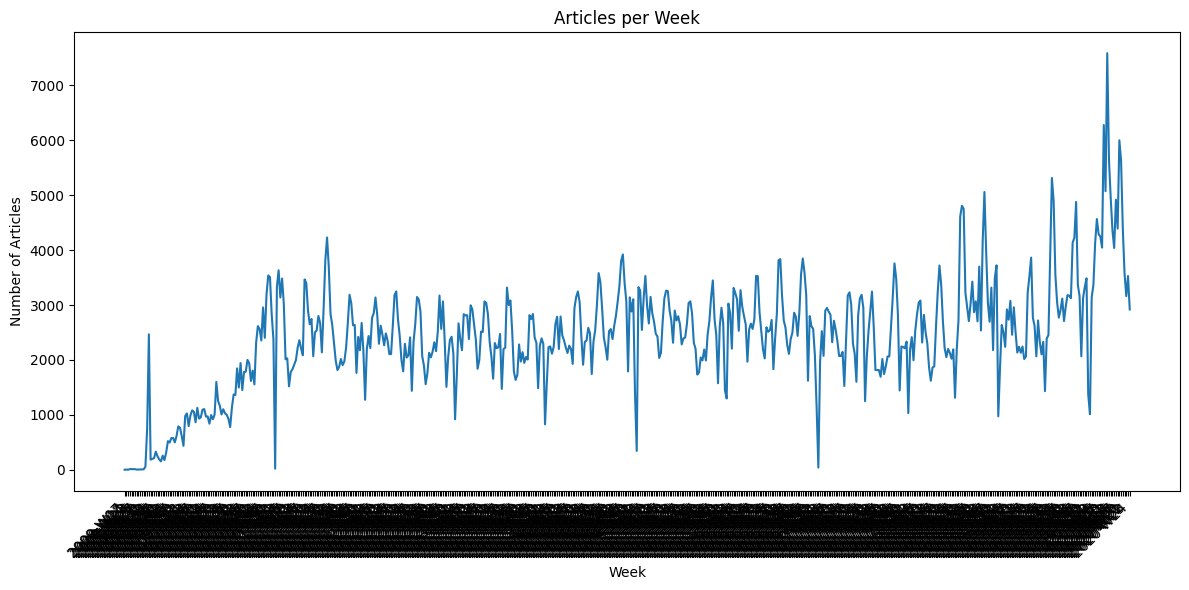

In [77]:
# count articles per week   
weekly_counts = df.groupby(['year', 'week']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.plot(
    weekly_counts['year'].astype(str) + '-W' + weekly_counts['week'].astype(str).str.zfill(2),
    weekly_counts['count']
)
plt.title('Articles per Week')
plt.xlabel('Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_20560/3876900959.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis')


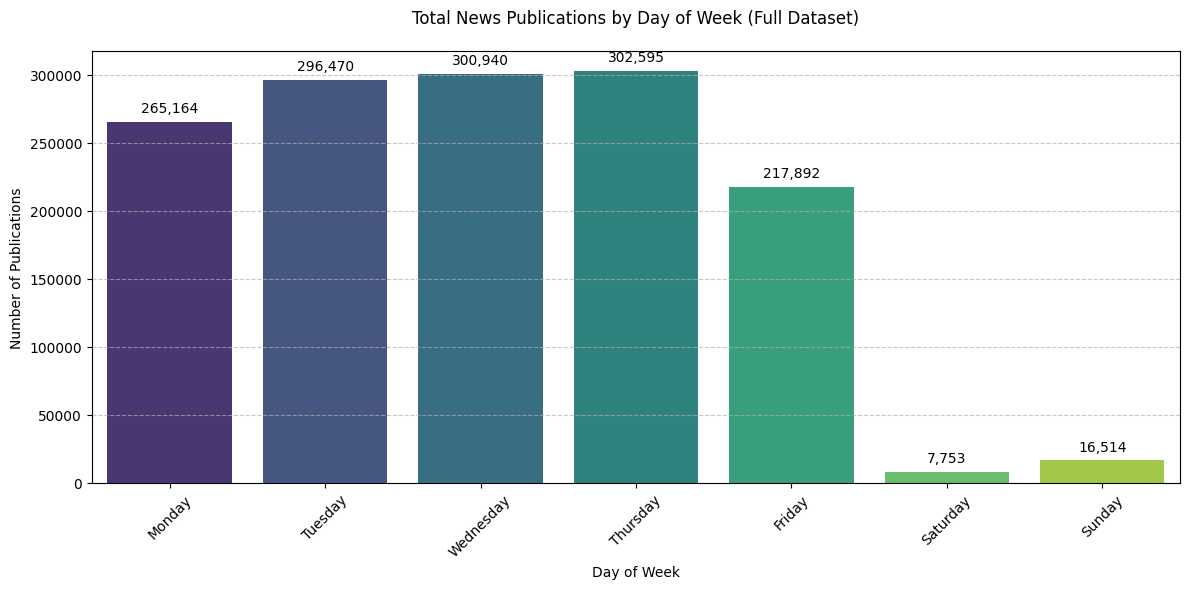

/tmp/ipykernel_20560/3876900959.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=daily_pct.index, y=daily_pct.values, palette='coolwarm')


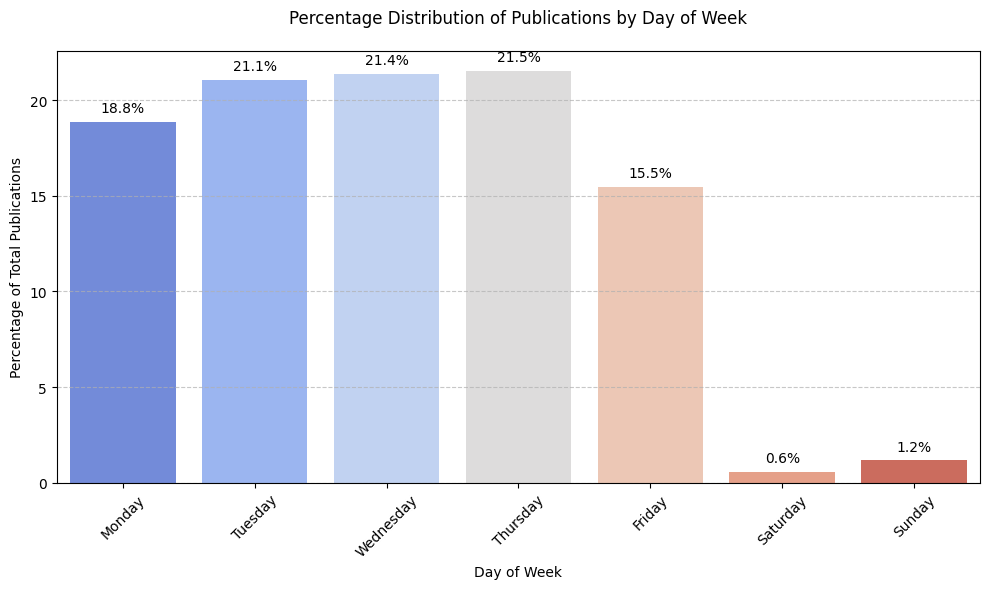

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract day of week information
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# 1. Overall Day-of-Week Distribution
plt.figure(figsize=(12, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = df['day_name'].value_counts().reindex(day_order)

ax = sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='viridis')
plt.title('Total News Publications by Day of Week (Full Dataset)', pad=20)
plt.xlabel('Day of Week')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Percentage Distribution
plt.figure(figsize=(10, 6))
daily_pct = (df['day_name'].value_counts(normalize=True) * 100).reindex(day_order)
ax = sns.barplot(x=daily_pct.index, y=daily_pct.values, palette='coolwarm')
plt.title('Percentage Distribution of Publications by Day of Week', pad=20)
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Total Publications')
plt.xticks(rotation=45)

# Add percentage labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype                    
---  ------      --------------    -----                    
 0   Unnamed: 0  1407328 non-null  int64                    
 1   headline    1407328 non-null  object                   
 2   url         1407328 non-null  object                   
 3   publisher   1407328 non-null  object                   
 4   date        1407328 non-null  datetime64[ns, UTC-04:00]
 5   stock       1407328 non-null  object                   
 6   year        1407328 non-null  int32                    
 7   month       1407328 non-null  int32                    
 8   week        1407328 non-null  UInt32                   
 9   day         1407328 non-null  int32                    
 10  time        1407328 non-null  object                   
dtypes: UInt32(1), datetime64[ns, UTC-04:00](1), int32(3), int64(1), object(5)
memory usage: 9

In [124]:
#save csv updated df
df.to_csv('../Data/new/updated_news_data.csv', index=True)